# **Problem 1a**

In [122]:
#importing libraries & mounting from google drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
file_path = "/content/drive/MyDrive/Class/Intro-to-ML-main/Datasets/Housing.csv"
data = pd.read_csv(file_path)
data.head( )

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [124]:
#input variables
features_a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_a = data[features_a].values
Y_a = data['price'].values

In [125]:
#splitting dataset 80/20
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(X_a, Y_a, test_size=0.2, random_state=42)
#add intercept term to training/testing
X_train_a = np.c_[np.ones(X_train_a.shape[0]), X_train_a]
X_test_a = np.c_[np.ones(X_test_a.shape[0]), X_test_a]

In [126]:
#gradient descent for multiple variables
def gd(X_train, Y_train, X_val, Y_val, lr, epochs):
  n_train = len(Y_train)
  n_val = len(Y_val)
  theta = np.zeros(X_train.shape[1])
  train_loss_his = []
  val_loss_his = []

  for i in range(epochs):
    #training prediction /loss
    Y_train_pred = X_train.dot(theta)
    train_loss = (1 / (2 * n_train)) * np.sum((Y_train_pred - Y_train) ** 2)
    train_loss_his.append(train_loss)


    #validation predction/loss
    Y_val_pred = X_val.dot(theta)
    val_loss = (1 / (2 * n_val)) * np.sum((Y_val_pred - Y_val) ** 2)
    val_loss_his.append(val_loss)

    #updating theta
    gradients = (1 / n_train) * X_train.T.dot(Y_train_pred - Y_train)
    theta = theta - lr * gradients
  return theta, train_loss_his, val_loss_his

In [142]:
lr = 0.01
epochs = 25
theta, train_loss_his, val_loss_his = gd(X_train_a, Y_train_a, X_test_a, Y_test_a, lr, epochs)

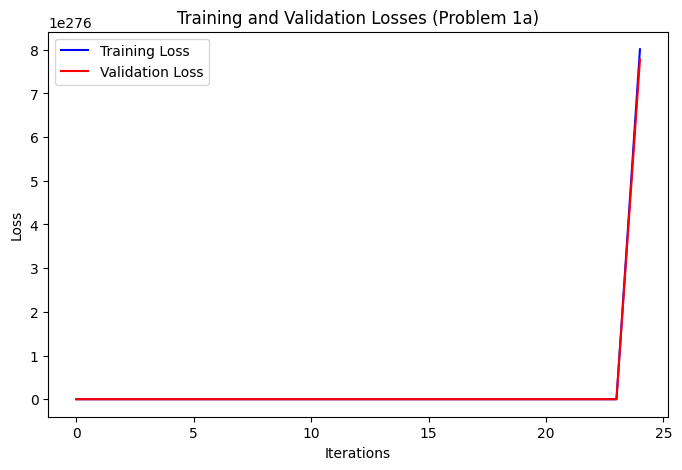

Final theta values for Problem 1a:  [3.68112745e+136 2.24354340e+140 1.10730893e+137 4.80988621e+136
 6.65515880e+136 2.97755292e+136]


In [143]:
#Plotting
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), train_loss_his, label='Training Loss', color='blue')
plt.plot(range(epochs), val_loss_his, label='Validation Loss', color='red')
plt.title('Training and Validation Losses (Problem 1a)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Output the final theta values
print("Final theta values for Problem 1a: ", theta)

# **Problem 1b**

In [144]:
#converting categorial variable to binary
columns_to_convert = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data[columns_to_convert] = (data[columns_to_convert] == 'yes').astype(int)

In [145]:
#feature selection
# Select the input variables for Problem 1b
features_1b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
               'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X_1b = data[features_1b].values
Y_1b = data['price'].values

In [146]:
#splitting dataset 80/20
X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(X_1b, Y_1b, test_size=0.2, random_state=42)
#adding intercept term to train/test
X_train_b = np.c_[np.ones(X_train_b.shape[0]), X_train_b]
X_test_b = np.c_[np.ones(X_test_b.shape[0]), X_test_b]

In [147]:
#running gd
# Run gradient descent for Problem 1b
theta_b, train_loss_his_b, val_loss_his_b = gd(X_train_b, Y_train_b, X_test_b, Y_test_b, lr, epochs)

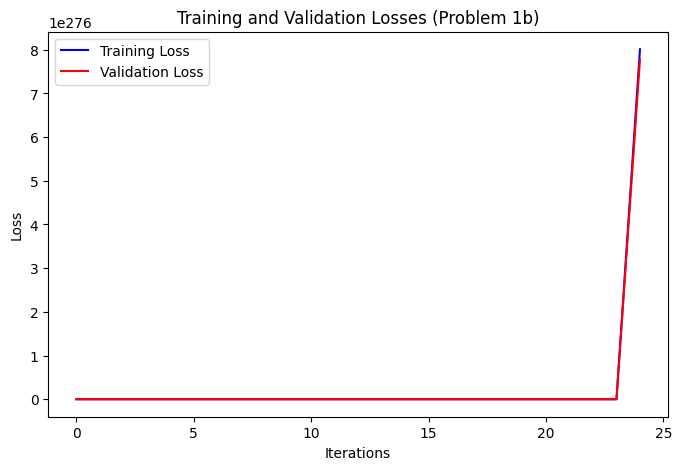

Final theta values for Problem 1b:  [3.68112745e+136 2.24354340e+140 1.10730893e+137 4.80988621e+136
 6.65515880e+136 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 2.97755292e+136 0.00000000e+000]


In [148]:
#Plotting
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), train_loss_his_b, label='Training Loss', color='blue')
plt.plot(range(epochs), val_loss_his_b, label='Validation Loss', color='red')
plt.title('Training and Validation Losses (Problem 1b)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Output the final theta values for Problem 1b
print("Final theta values for Problem 1b: ", theta_b)

# **Problem 2a**

In [149]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
epochs = 1000

In [150]:
#prepping data
X_2a = data[features_a].values
Y_2a = data['price'].values

#splitting 80/20 dataset
X_train_2a, X_test_2a, Y_train_2a, Y_test_2a = train_test_split(X_2a, Y_2a, test_size=0.2, random_state=42)

#normalzing
normalizer = MinMaxScaler()
X_train_norm = normalizer.fit_transform(X_train_2a)
X_test_norm = normalizer.transform(X_test_2a)

#standarization between 0 and 1
standarizer = StandardScaler()
X_train_std = standarizer.fit_transform(X_train_2a)
X_test_std = standarizer.transform(X_test_2a)

#adding intercept to normalized/standarized data
X_train_norm = np.c_[np.ones(X_train_norm.shape[0]), X_train_norm]
X_test_norm = np.c_[np.ones(X_test_norm.shape[0]), X_test_norm]
X_train_std = np.c_[np.ones(X_train_std.shape[0]), X_train_std]
X_test_std = np.c_[np.ones(X_test_std.shape[0]), X_test_std]

In [151]:
#running gd for normalize data
theta_norm, train_loss_norm, val_loss_norm = gd(X_train_norm, Y_train_2a, X_test_norm, Y_test_2a, lr, epochs)
#running gd for standarized data
theta_std, train_loss_std, val_loss_std = gd(X_train_std, Y_train_2a, X_test_std, Y_test_2a, lr, epochs)

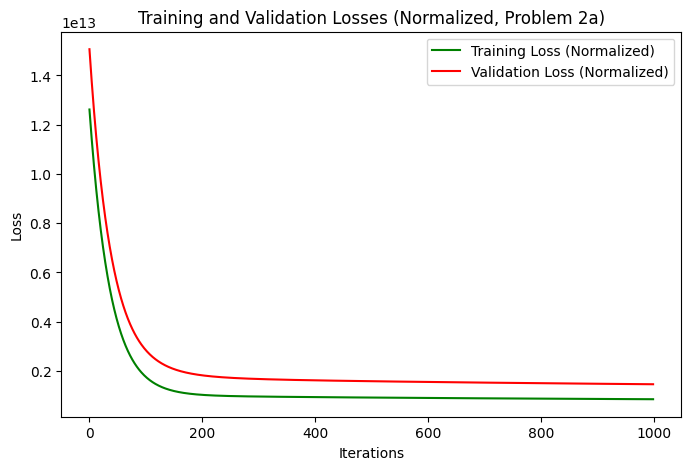

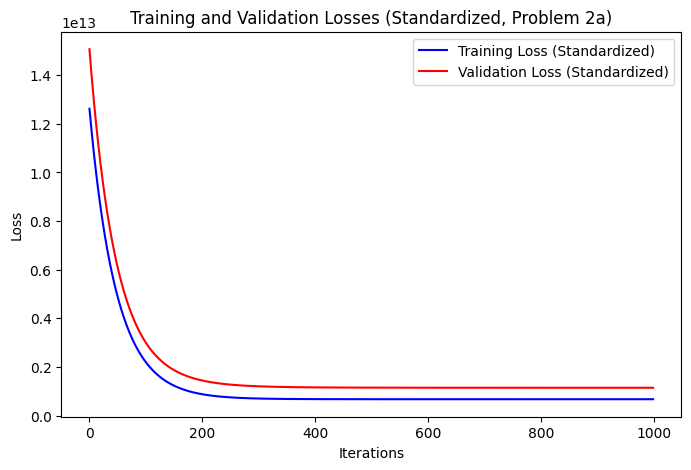

Final theta values (Normalized, Problem 2a): [3003436.32770682 1594381.78836447 1471384.436388   1121038.15840208
 1433551.94486797 1336236.55962768]
Final theta values (Standardized, Problem 2a): [4706324.19866291  679784.16108007  113853.85524508  564996.83769347
  423850.53400103  288572.51539751]


In [152]:
#plotting for training and validation losses for normalize dta
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), train_loss_norm, label='Training Loss (Normalized)', color='green')
plt.plot(range(epochs), val_loss_norm, label='Validation Loss (Normalized)', color='red')
plt.title('Training and Validation Losses (Normalized, Problem 2a)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# for training and validation losses for standardized data
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), train_loss_std, label='Training Loss (Standardized)', color='blue')
plt.plot(range(epochs), val_loss_std, label='Validation Loss (Standardized)', color='red')
plt.title('Training and Validation Losses (Standardized, Problem 2a)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display final theta values for normalized and standardized data
print("Final theta values (Normalized, Problem 2a):", theta_norm)
print("Final theta values (Standardized, Problem 2a):", theta_std)

# **Problem 2b**

In [157]:
#prepping data
X_2b = data[features_1b].values
Y_2b = data['price'].values

#splitting 80/20 data
X_train_2b, X_test_2b, Y_train_2b, Y_test_2b = train_test_split(X_2b, Y_2b, test_size=0.2, random_state=42)


# normalizing
X_train_norm_2b = normalizer.fit_transform(X_train_2b)
X_test_norm_2b = normalizer.transform(X_test_2b)

# standarization
X_train_std_2b = standarizer.fit_transform(X_train_2b)
X_test_std_2b = standarizer.transform(X_test_2b)

# adding intercept to normalized/standarized data
X_train_norm_2b = np.c_[np.ones(X_train_norm_2b.shape[0]), X_train_norm_2b]
X_test_norm_2b = np.c_[np.ones(X_test_norm_2b.shape[0]), X_test_norm_2b]
X_train_std_2b = np.c_[np.ones(X_train_std_2b.shape[0]), X_train_std_2b]
X_test_std_2b = np.c_[np.ones(X_test_std_2b.shape[0]), X_test_std_2b]

In [158]:
# running gd for normlized data
theta_norm_2b, train_loss_norm_2b, val_loss_norm_2b = gd(X_train_norm_2b, Y_train_2b, X_test_norm_2b, Y_test_2b, lr, epochs)
# running gd for standarized data
theta_std_2b, train_loss_std_2b, val_loss_std_2b = gd(X_train_std_2b, Y_train_2b, X_test_std_2b, Y_test_2b, lr, epochs)

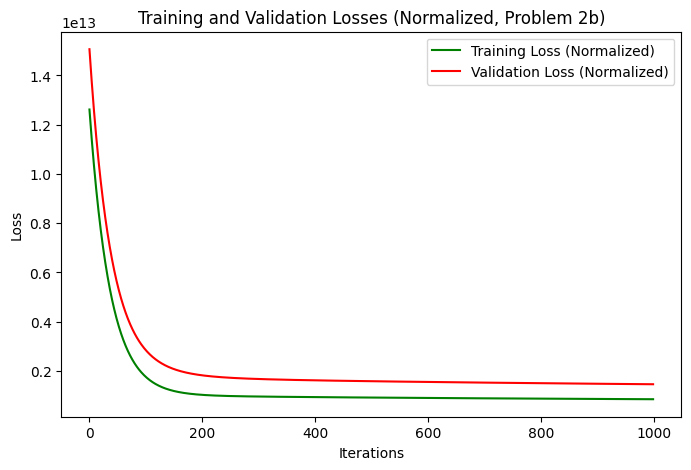

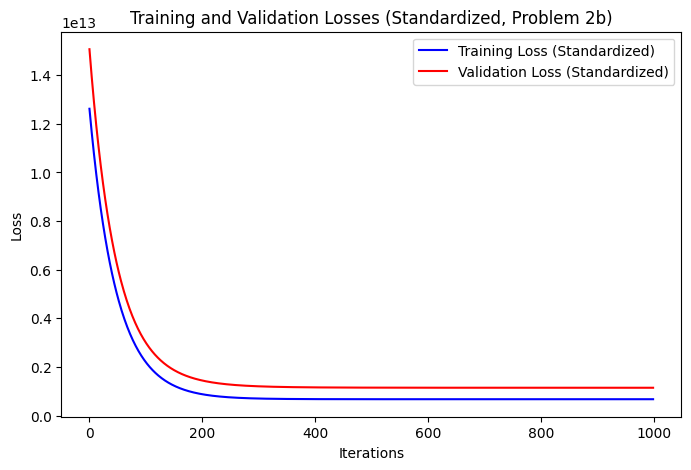

Final theta values (Normalized, Problem 2b): [3003436.32770682 1594381.78836447 1471384.436388   1121038.15840209
 1433551.94486797       0.               0.               0.
       0.               0.         1336236.55962768       0.        ]
Final theta values (Standardized, Problem 2b): [4706324.19866291  679784.16108007  113853.85524508  564996.83769347
  423850.53400103       0.               0.               0.
       0.               0.          288572.51539751       0.        ]


In [159]:
#plotting normlize data
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), train_loss_norm_2b, label='Training Loss (Normalized)', color='green')
plt.plot(range(epochs), val_loss_norm_2b, label='Validation Loss (Normalized)', color='red')
plt.title('Training and Validation Losses (Normalized, Problem 2b)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

#plotting standarized data
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), train_loss_std_2b, label='Training Loss (Standardized)', color='blue')
plt.plot(range(epochs), val_loss_std_2b, label='Validation Loss (Standardized)', color='red')
plt.title('Training and Validation Losses (Standardized, Problem 2b)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# displaying normalize and standrized final theta
print("Final theta values (Normalized, Problem 2b):", theta_norm_2b)
print("Final theta values (Standardized, Problem 2b):", theta_std_2b)

# **Problem 3a**

In [160]:
#gd function with L2 regulization
def gdl2(X_train, Y_train, X_val, Y_val, lr, epochs, lambda_reg):
    n_train = len(Y_train)
    n_val = len(Y_val)
    theta = np.zeros(X_train.shape[1])
    training_loss_his = []
    validation_loss_his = []

    for i in range(epochs):
        # Training predictions and loss (with L2 regularization)
        Y_train_pred = X_train.dot(theta)
        train_loss = (1 / (2 * n_train)) * np.sum((Y_train_pred - Y_train) ** 2) + (lambda_reg / (2 * n_train)) * np.sum(theta[1:] ** 2)
        training_loss_his.append(train_loss)

        # Validation predictions and loss (without regularization)
        Y_val_pred = X_val.dot(theta)
        val_loss = (1 / (2 * n_val)) * np.sum((Y_val_pred - Y_val) ** 2)
        validation_loss_his.append(val_loss)

        # Gradient descent update with L2 regularization
        gradients = (1 / n_train) * X_train.T.dot(Y_train_pred - Y_train) + (lambda_reg / n_train) * np.concatenate([[0], theta[1:]])
        theta = theta - lr * gradients

    return theta, training_loss_his, validation_loss_his

In [161]:
#regulirization parameter
lambda_reg = .1 # need to be tuned

# gd with normalized data
theta_l2_norm, train_loss_l2_norm, val_loss_l2_norm = gdl2(X_train_norm, Y_train_2a, X_test_norm, Y_test_2a, lr, epochs, lambda_reg)
# gd with standarized data
theta_l2_std, train_loss_l2_std, val_loss_l2_std = gdl2(X_train_std, Y_train_2a, X_test_std, Y_test_2a, lr, epochs, lambda_reg)


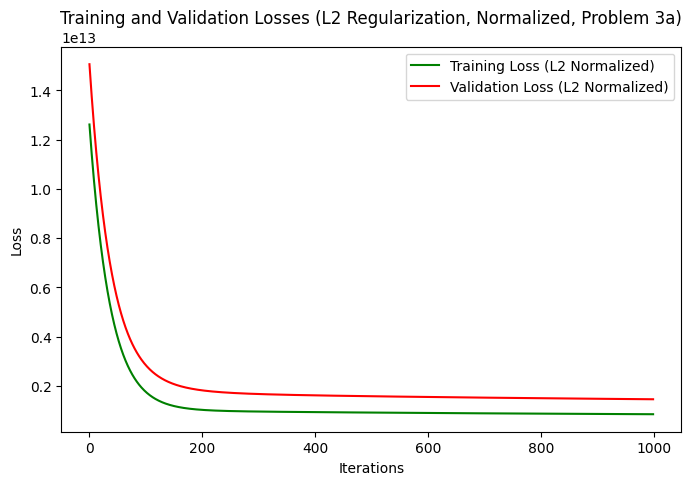

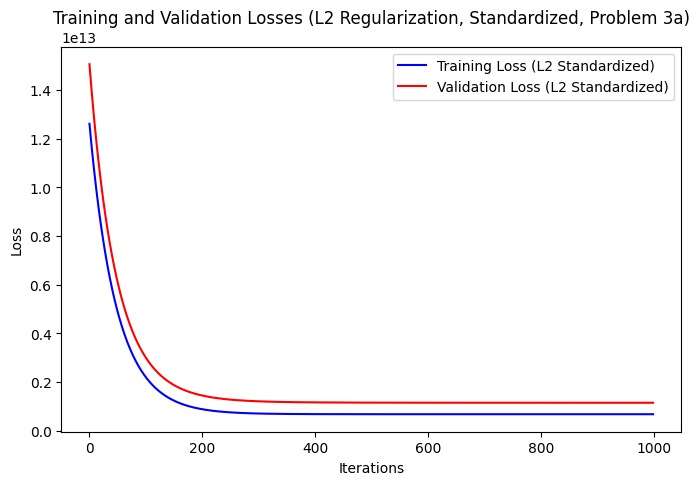

Final theta values (L2 Normalized, Problem 3a): [3005216.59172704 1592457.69842992 1469445.76412682 1119924.1043048
 1432181.38620782 1334948.97823939]
Final theta values (L2 Standardized, Problem 3a): [4706324.19866291  679646.07091688  113921.48903451  564895.87915121
  423768.50506133  288566.75005349]


In [162]:
#plotting normalized dtaa with L2 regularization
plt.figure(figsize=(8, 5))
plt.plot(range(len(train_loss_l2_norm)), train_loss_l2_norm, label='Training Loss (L2 Normalized)', color='green')
plt.plot(range(len(val_loss_l2_norm)), val_loss_l2_norm, label='Validation Loss (L2 Normalized)', color='red')
plt.title('Training and Validation Losses (L2 Regularization, Normalized, Problem 3a)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

#plotting standarized data with L2 regularization
plt.figure(figsize=(8, 5))
plt.plot(range(len(train_loss_l2_std)), train_loss_l2_std, label='Training Loss (L2 Standardized)', color='blue')
plt.plot(range(len(val_loss_l2_std)), val_loss_l2_std, label='Validation Loss (L2 Standardized)', color='red')
plt.title('Training and Validation Losses (L2 Regularization, Standardized, Problem 3a)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Output final theta values with L2 regularization for normalized and standardized data
print("Final theta values (L2 Normalized, Problem 3a):", theta_l2_norm)
print("Final theta values (L2 Standardized, Problem 3a):", theta_l2_std)

# **Problem 3b**

In [163]:
# Run gradient descent with L2 regularization for normalized data in Problem 3b
theta_l2_norm_2b, train_loss_l2_norm_2b, val_loss_l2_norm_2b = gdl2(X_train_norm_2b, Y_train_2b, X_test_norm_2b, Y_test_2b, lr, epochs, lambda_reg)

# Run gradient descent with L2 regularization for standardized data in Problem 3b
theta_l2_std_2b, train_loss_l2_std_2b, val_loss_l2_std_2b = gdl2(X_train_std_2b, Y_train_2b, X_test_std_2b, Y_test_2b, lr, epochs, lambda_reg)

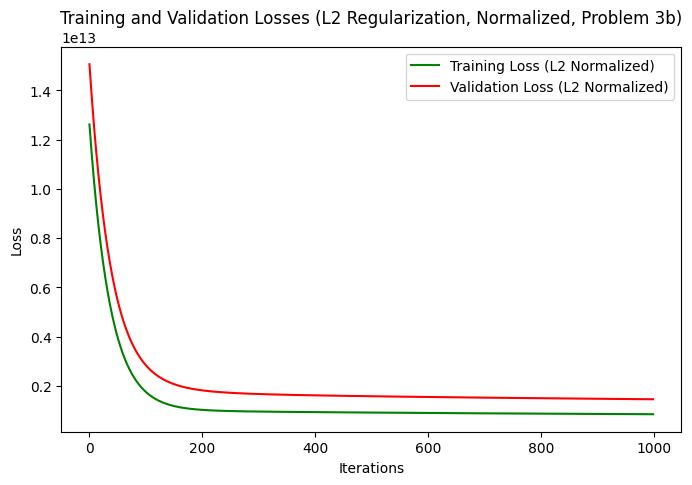

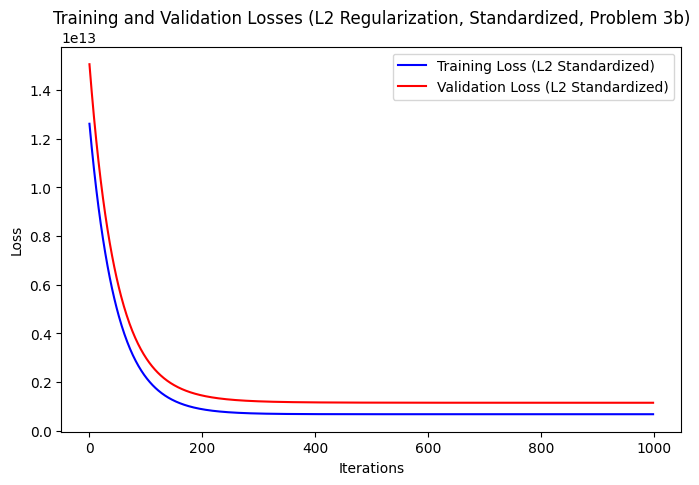

Final theta values (L2 Normalized, Problem 3b): [3005216.59172704 1592457.69842992 1469445.76412682 1119924.1043048
 1432181.38620782       0.               0.               0.
       0.               0.         1334948.97823939       0.        ]
Final theta values (L2 Standardized, Problem 3b): [4706324.19866291  679646.07091688  113921.48903451  564895.87915121
  423768.50506133       0.               0.               0.
       0.               0.          288566.75005349       0.        ]


In [164]:
# plotting normalized
plt.figure(figsize=(8, 5))
plt.plot(range(len(train_loss_l2_norm_2b)), train_loss_l2_norm_2b, label='Training Loss (L2 Normalized)', color='green')
plt.plot(range(len(val_loss_l2_norm_2b)), val_loss_l2_norm_2b, label='Validation Loss (L2 Normalized)', color='red')
plt.title('Training and Validation Losses (L2 Regularization, Normalized, Problem 3b)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting standarized
plt.figure(figsize=(8, 5))
plt.plot(range(len(train_loss_l2_std_2b)), train_loss_l2_std_2b, label='Training Loss (L2 Standardized)', color='blue')
plt.plot(range(len(val_loss_l2_std_2b)), val_loss_l2_std_2b, label='Validation Loss (L2 Standardized)', color='red')
plt.title('Training and Validation Losses (L2 Regularization, Standardized, Problem 3b)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Output final theta values with L2 regularization for normalized and standardized data in Problem 3b
print("Final theta values (L2 Normalized, Problem 3b):", theta_l2_norm_2b)
print("Final theta values (L2 Standardized, Problem 3b):", theta_l2_std_2b)